# DataSets: 
#### historic_prices_pkl
#### custom.pkl
#### intel_senti.pkl
#### intel_importable.pkl

In [1]:
pip install -U numpy==1.18.5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import requests
import urllib
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time

import matplotlib.ticker as tkr
%matplotlib inline
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

# Historic Data-set Collection

In [4]:
quandl.ApiConfig.api_key = '58nMn45N8WncsaoZD1FS'
selected                 = ["AAPL","CSCO","INTC","MSFT"]
df1                      = quandl.get_table('WIKI/PRICES', 
                                             ticker = selected,
                                             qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                                             date = { 'gte': '2010-1-1', 'lte': '2019-12-31' }, 
                                             paginate = True)
print(df1.shape)
df1.head()

(8282, 3)


,date,ticker,adj_close
None,,,
0,2018-03-27,MSFT,89.47
1,2018-03-26,MSFT,93.78
2,2018-03-23,MSFT,87.18
3,2018-03-22,MSFT,89.79
4,2018-03-21,MSFT,92.48


In [5]:
df1 = df1.pivot(columns = 'ticker',index = "date",values = "adj_close")
df1 = pd.DataFrame(df1.to_records()).rename(columns={'date':'time'})
df1.head()


,time,AAPL,CSCO,INTC,MSFT
0,2010-01-04,27.503268,20.403200,16.019937,25.153472
1,2010-01-05,27.550818,20.312299,16.012265,25.161599
2,2010-01-06,27.112585,20.180079,15.958558,25.007183
3,2010-01-07,27.062465,20.270980,15.805111,24.748741
4,2010-01-08,27.242385,20.378409,15.981575,24.917785


In [6]:
df2 = df1.sort_values("time")
df2 = df2.set_index("time")
df2.tail()

,AAPL,CSCO,INTC,MSFT
time,,,,
2018-03-21,171.270,44.31,51.56,92.48
2018-03-22,168.845,43.07,50.83,89.79
2018-03-23,164.940,42.42,49.36,87.18
2018-03-26,172.770,44.06,52.48,93.78
2018-03-27,168.340,42.68,51.19,89.47


In [7]:
df2.to_pickle("data sets/historic_prices.pkl")

In [8]:
df3 = pd.read_pickle("data sets/historic_prices.pkl")
df3.head()

,AAPL,CSCO,INTC,MSFT
time,,,,
2010-01-04,27.503268,20.403200,16.019937,25.153472
2010-01-05,27.550818,20.312299,16.012265,25.161599
2010-01-06,27.112585,20.180079,15.958558,25.007183
2010-01-07,27.062465,20.270980,15.805111,24.748741
2010-01-08,27.242385,20.378409,15.981575,24.917785


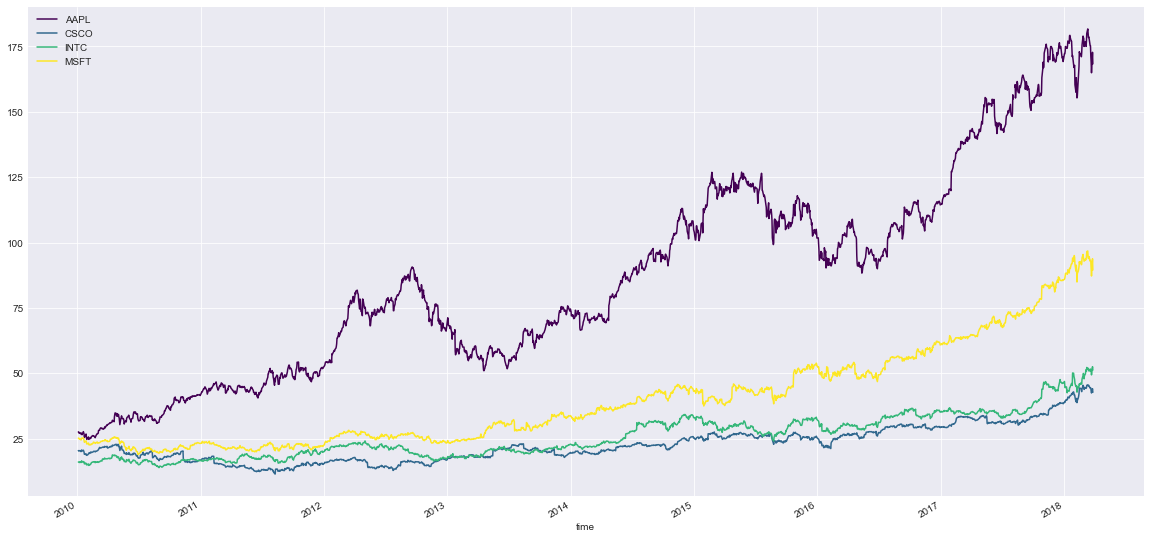

In [9]:
plt.style.use('seaborn-dark')

df3.plot(cmap= "viridis",figsize=(20,10))
plt.grid()
plt.show()

# Sentiment Analysis

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
df2 = pd.read_pickle("data sets/custom_intel.pkl")

In [12]:
df2

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"May 17, 2021",The parking guidance system solution is develo...
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"Sep 07, 2021",Intel Corp on Tuesday said it could invest as ...
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"Sep 07, 2021",Intel Corp on Tuesday said that it will reserv...
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"May 02, 2021",JERUSALEM — Intel Corp said on Sunday it will ...
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"Oct 27, 2021",Intel Corp and Alphabet Inc’s Google Cloud on ...
...,...,...,...,...,...
2594,260,https://financialpost.com/search/?search_text=...,https://financialpost.com/entrepreneur/fp-star...,"Mar 11, 2013","SAN FRANCISCO — Last spring, the future for Vi..."
2595,260,https://financialpost.com/search/?search_text=...,https://financialpost.com/executive/posthaste-...,"Jun 23, 2020",Good morning!The Canada Emergency Response Ben...
2596,260,https://financialpost.com/search/?search_text=...,https://financialpost.com/commodities/mining/s...,"Sep 16, 2012",Gold was up (at press time) $33.50 (+1.9%) for...
2597,260,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/reu...,"Jan 16, 2020",Ukraine has asked the FBI in the United States...


In [13]:
text_1 = df2["internals_text"]
text_1

0       The parking guidance system solution is develo...
1       Intel Corp on Tuesday said it could invest as ...
2       Intel Corp on Tuesday said that it will reserv...
3       JERUSALEM — Intel Corp said on Sunday it will ...
4       Intel Corp and Alphabet Inc’s Google Cloud on ...
                              ...                        
2594    SAN FRANCISCO — Last spring, the future for Vi...
2595    Good morning!The Canada Emergency Response Ben...
2596    Gold was up (at press time) $33.50 (+1.9%) for...
2597    Ukraine has asked the FBI in the United States...
2598    TORONTO • Mark Rivkin is lying on his back on ...
Name: internals_text, Length: 2575, dtype: object

In [14]:
text_1[0]

'The parking guidance system solution is developed in collaboration with IntelBENGALURU, India — L&T Technology Services Limited (BSE: 540115, NSE: LTTS), a leading global engineering services company, announced today that it worked with Intel Corporation to develop an outdoor smart parking solution. The solution is powered by the Intel distribution of the OpenVINO Toolkit to run AI inferencing models on Intel Xeon scalable processors and Intel Movidius VPUs. With edge AI capabilities, the solution aims to redefine the outdoor smart parking experience in public areas across the globe. '

In [15]:
def split_by_dot(x):
    return(x.split("."))

df2["internals_text_split_by_dot"] = df2["internals_text"].apply(split_by_dot) 

df2["internals_text_split_by_dot"]

0       [The parking guidance system solution is devel...
1       [Intel Corp on Tuesday said it could invest as...
2       [Intel Corp on Tuesday said that it will reser...
3       [JERUSALEM — Intel Corp said on Sunday it will...
4       [Intel Corp and Alphabet Inc’s Google Cloud on...
                              ...                        
2594    [SAN FRANCISCO — Last spring, the future for V...
2595    [Good morning!The Canada Emergency Response Be...
2596    [Gold was up (at press time) $33, 50 (+1, 9%) ...
2597    [Ukraine has asked the FBI in the United State...
2598    [TORONTO • Mark Rivkin is lying on his back on...
Name: internals_text_split_by_dot, Length: 2575, dtype: object

In [16]:
df2["time"] = pd.to_datetime(df2["internals_dates"])
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot,time
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"May 17, 2021",The parking guidance system solution is develo...,[The parking guidance system solution is devel...,2021-05-17
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"Sep 07, 2021",Intel Corp on Tuesday said it could invest as ...,[Intel Corp on Tuesday said it could invest as...,2021-09-07
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"Sep 07, 2021",Intel Corp on Tuesday said that it will reserv...,[Intel Corp on Tuesday said that it will reser...,2021-09-07
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"May 02, 2021",JERUSALEM — Intel Corp said on Sunday it will ...,[JERUSALEM — Intel Corp said on Sunday it will...,2021-05-02
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/int...,"Oct 27, 2021",Intel Corp and Alphabet Inc’s Google Cloud on ...,[Intel Corp and Alphabet Inc’s Google Cloud on...,2021-10-27


In [17]:
df2 = df2.sort_values("time")
df2 = df2.set_index("time")
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot
time,,,,,,
2011-11-25,98,https://financialpost.com/search/?search_text=...,https://financialpost.com/uncategorized/should...,"Nov 25, 2011",Independent Investor,[Independent Investor]
2011-11-30,27,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/today-in-...,"Nov 30, 2011",Tech firms making news this morning: Internati...,[Tech firms making news this morning: Internat...
2011-12-08,40,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/apple-only...,"Dec 08, 2011",It’s that time of year again: Fortune Magazine...,[It’s that time of year again: Fortune Magazin...
2011-12-09,225,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/texas-inst...,"Dec 09, 2011",Texas Instruments Inc. dropped the most in alm...,"[Texas Instruments Inc, dropped the most in a..."
2011-12-12,132,https://financialpost.com/search/?search_text=...,https://financialpost.com/uncategorized/stocks...,"Dec 12, 2011",Most global markets declined on Monday after i...,[Most global markets declined on Monday after ...


In [18]:
df2.to_pickle("data sets/intel_with_time.pkl")

In [19]:
df2 = pd.read_pickle("data sets/intel_with_time.pkl")
df2.dropna(inplace=True)

In [20]:
def sentimental_analysis_by_phrase(y):
    
    y = list(map(lambda x: analyser.polarity_scores(x)["compound"],y))
    y = np.array(y)
    y = y[y != 0]
    return(y)


In [21]:

text_2 = df2["internals_text_split_by_dot"][0]
text_2

['Independent Investor']

In [22]:
sentimental_analysis_by_phrase(text_2)

array([], dtype=float64)

In [23]:
df2["sentimental_analysis_split_by_dot"] = df2["internals_text_split_by_dot"].apply(sentimental_analysis_by_phrase) 

df2["sentimental_analysis_split_by_dot"]

time
2011-11-25                            []
2011-11-30                        [0.25]
2011-12-08                      [0.2023]
2011-12-09    [-0.5267, -0.128, -0.6124]
2011-12-12                      [0.0772]
                         ...            
2021-11-16                       [0.743]
2021-11-18              [0.4019, 0.4939]
2021-11-18             [0.1531, -0.4005]
2021-11-18              [0.7717, 0.6908]
2021-11-18             [0.1531, -0.4005]
Name: sentimental_analysis_split_by_dot, Length: 2575, dtype: object

In [24]:
df2.dropna(inplace=True)

In [25]:
df2["sentimental_analysis_split_by_dot_average"] = df2["sentimental_analysis_split_by_dot"].apply(np.mean)
df2["sentimental_analysis_split_by_dot_average"]

time
2011-11-25         NaN
2011-11-30    0.250000
2011-12-08    0.202300
2011-12-09   -0.422367
2011-12-12    0.077200
                ...   
2021-11-16    0.743000
2021-11-18    0.447900
2021-11-18   -0.123700
2021-11-18    0.731250
2021-11-18   -0.123700
Name: sentimental_analysis_split_by_dot_average, Length: 2575, dtype: float64

In [26]:
def sentimental_analysis(y):
    
    return(analyser.polarity_scores(y)["compound"])


In [27]:
df2["sentimental_analysis_complete_text"] = df2["internals_text"].apply(sentimental_analysis) 

df2["sentimental_analysis_complete_text"]

time
2011-11-25    0.0000
2011-11-30    0.2500
2011-12-08    0.2023
2011-12-09   -0.8360
2011-12-12    0.0772
               ...  
2021-11-16    0.8573
2021-11-18    0.7311
2021-11-18   -0.2716
2021-11-18    0.9081
2021-11-18   -0.2716
Name: sentimental_analysis_complete_text, Length: 2575, dtype: float64

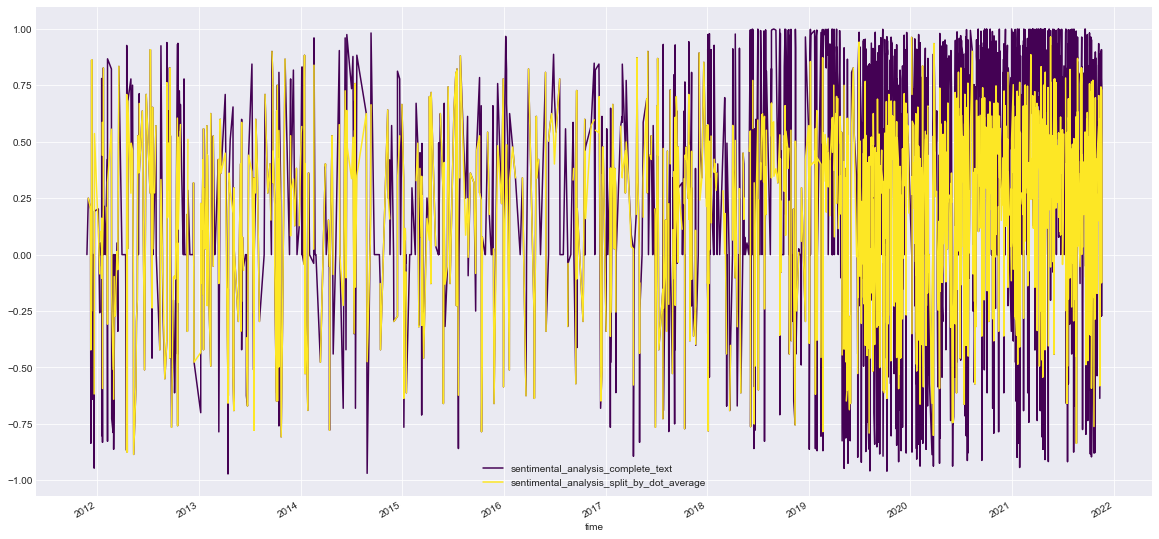

In [57]:
plt.style.use('seaborn-dark')
df2[["sentimental_analysis_complete_text","sentimental_analysis_split_by_dot_average"]].plot(cmap = "viridis",linestyle='-',figsize = (20,10))
plt.grid()
plt.show()

In [29]:
df2.to_pickle("data sets/intel_senti.pkl")

# Combinging the 2 datasets (Prices and sentiment)

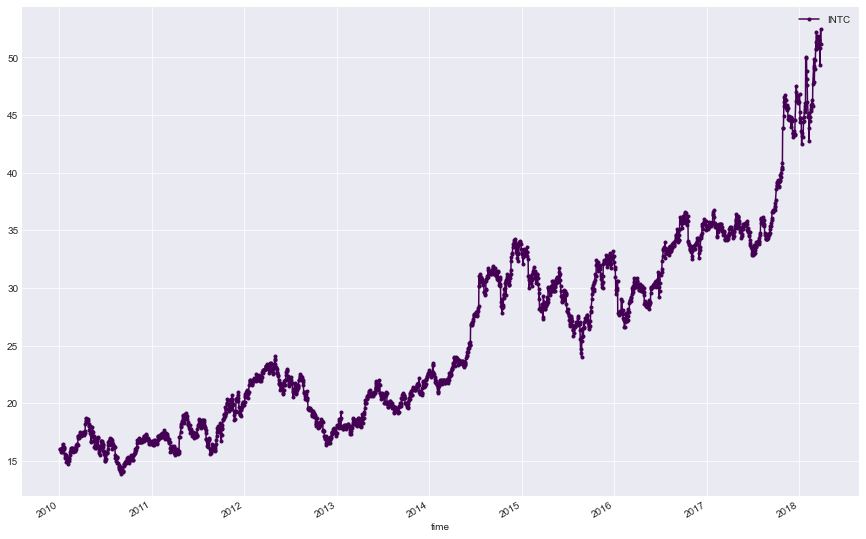

In [31]:
df_values = pd.read_pickle("data sets/historic_prices.pkl")
#df_values.head()


intel_df = df_values[["INTC"]]
intel_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

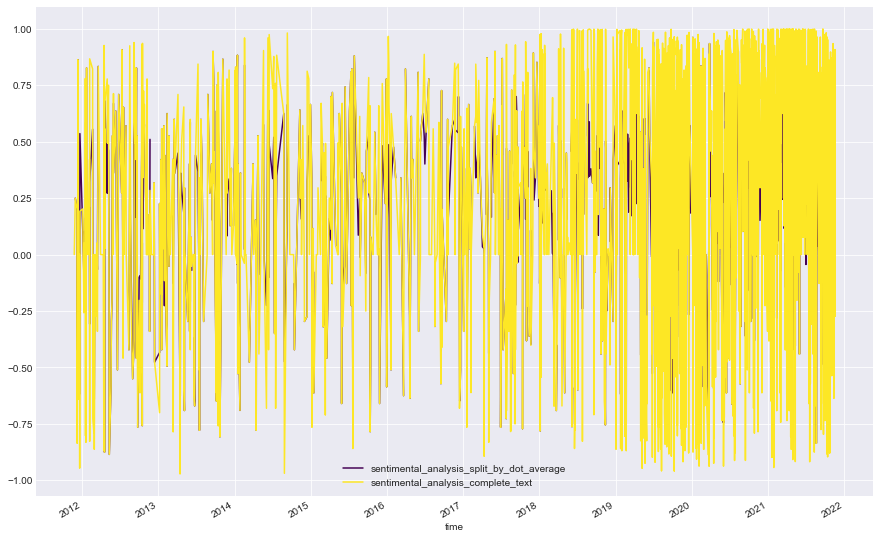

In [30]:
df_text = pd.read_pickle("data sets/intel_senti.pkl")

In [32]:
X = df_text["sentimental_analysis_split_by_dot_average"].copy()
X = X.reset_index(drop= False)
X["time"] = pd.to_datetime(X["time"],errors = 'coerce', format = '%Y-%m-%dT%H:%M',infer_datetime_format = True, cache = True,utc=True)
X["time"] = pd.to_datetime(X["time"])

X = X.set_index(pd.DatetimeIndex(X["time"]))
X.set_index("time")
X.shape

(2575, 2)

In [33]:
df_text = pd.read_pickle("data sets/intel_senti.pkl")
#df_text_gensim.head()
names     = df_text.columns
df_final = df_text[names[5:]].copy()

df_final = df_final.set_index(X.index)

X = pd.concat([X,df_final],axis= 1)

In [34]:
X = X.drop(["time"],axis= 1)

In [35]:
X = X.resample('1d').first()
X = X.tz_convert(None)


In [36]:
y = intel_df.copy()
y.shape

(2071, 1)

In [37]:
result = pd.concat([X,y], axis=1,join='inner')
result.shape


(1592, 6)

In [38]:
result = result.fillna(method='ffill', inplace=False)



In [39]:
result.shape

(1592, 6)

In [40]:
result.dropna(inplace=True)
result

,sentimental_analysis_split_by_dot_average,internals_text_split_by_dot,sentimental_analysis_split_by_dot,sentimental_analysis_split_by_dot_average,sentimental_analysis_complete_text,INTC
time,,,,,,
2011-11-30,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,20.386244
2011-12-01,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,20.394428
2011-12-02,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,20.165277
2011-12-05,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,20.468084
2011-12-06,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,20.746339
...,...,...,...,...,...,...
2018-03-21,0.2588,[NEW YORK — The latest on developments in fina...,[],0.2588,0.0000,51.560000
2018-03-22,0.2588,[NEW YORK — The latest on developments in fina...,[],0.2588,0.0000,50.830000
2018-03-23,-0.6908,[PHOENIX — Video of a fatal pedestrian crash i...,[-0.6908],-0.6908,-0.6908,49.360000


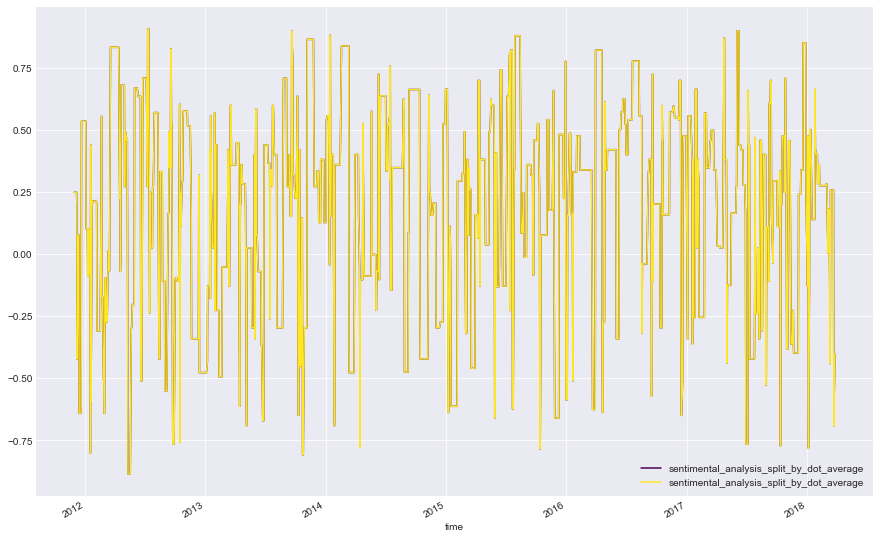

In [41]:
result[["sentimental_analysis_split_by_dot_average"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

In [42]:
result.to_pickle("data sets/intel_importable.pkl")

# Final Modeling for LSTM w/o Sentiment Analysis

In [43]:
result= pd.read_pickle("data sets/intel_importable.pkl")

# original time serie (Y)
y = result.INTC.values 
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)



# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [44]:
look_back = 30


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)




# join the all the features in one
## reshape arrays
X_train_features = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))


In [45]:
model = Sequential()
temp_x= X_train_features.shape[1]
temp_y =X_train_features.shape[2]
print(temp_y)

30


In [46]:
model.add(LSTM(200, input_shape=(X_train_features.shape[1], X_train_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               184800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 185,001
Trainable params: 185,001
Non-trainable params: 0
_________________________________________________________________


In [47]:


history = model.fit(X_train_features,y_train, epochs=300, batch_size=25, validation_data=(X_test_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)
train_predict = model.predict(X_train_features)
test_predict  = model.predict(X_test_features)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

Train Mean Absolute Error: 0.0398572
Train Root Mean Squared Error: 0.044529814
Test Mean Absolute Error: 0.04459801
Test Root Mean Squared Error: 0.063198574


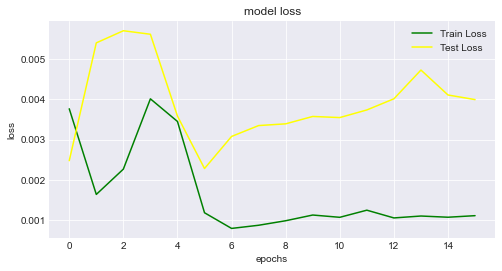

In [48]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')

plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

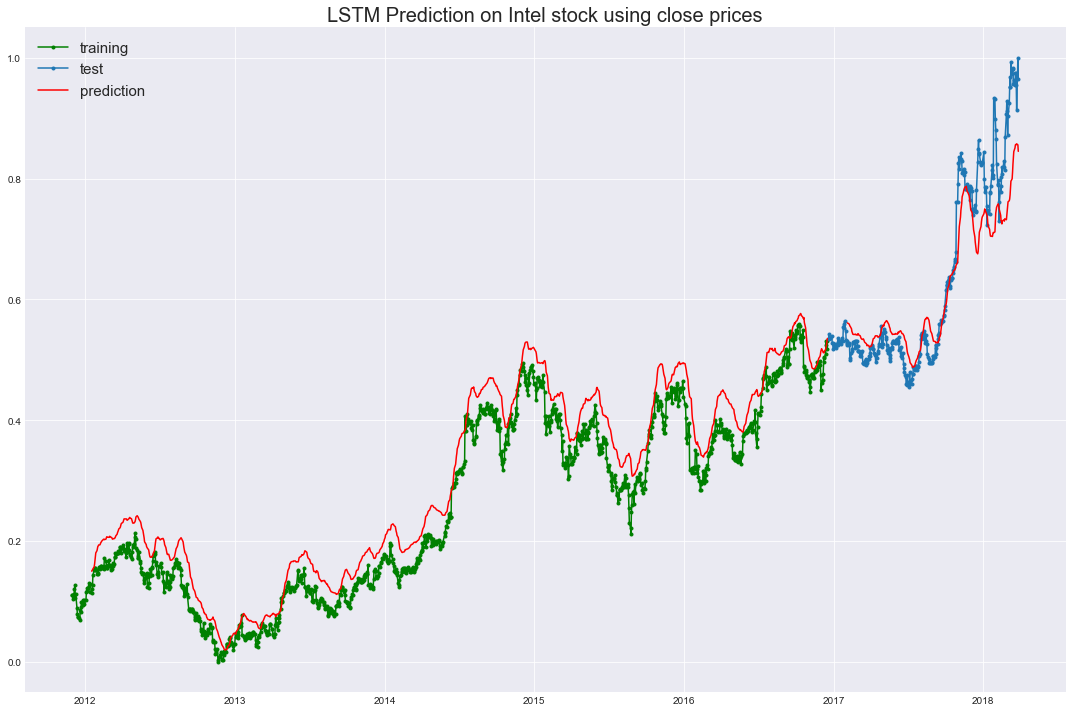

In [49]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[look_back+1:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[look_back+1:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM Prediction on Intel stock using close prices",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

# Modeling with sentiment Analysis

In [50]:
result= pd.read_pickle("data sets/intel_importable.pkl")

# original time serie (Y)
y = result.INTC.values #numpy.ndarray
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)


# extra information: features of the sentiment analysis
X = result.sentimental_analysis_split_by_dot_average.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))

# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]
train_x, test_x = X[0:train_size,:], X[train_size:train_size+test_size,:]



def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
test_x.shape

(318, 1)

In [51]:
look_back = 30


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)


# calculate extra features in (X)
X_train_features_2, auxiliar_1 = create_dataset(train_x, look_back)
X_test_features_2, auxiliar_2 = create_dataset(test_x, look_back)


# join the all the features in one
## reshape arrays
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))
## put all together
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)


In [52]:
temp_x= X_train_features.shape[1]
temp_y =X_train_features.shape[2]
print(temp_x)

1


In [53]:
model = Sequential()
model.add(LSTM(200, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_all_features,y_train, epochs=300, batch_size=25, validation_data=(X_test_all_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               184800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 185,001
Trainable params: 185,001
Non-trainable params: 0
_________________________________________________________________


In [54]:
train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

Train Mean Absolute Error: 0.038253237
Train Root Mean Squared Error: 0.044051822
Test Mean Absolute Error: 0.06295796
Test Root Mean Squared Error: 0.07741938


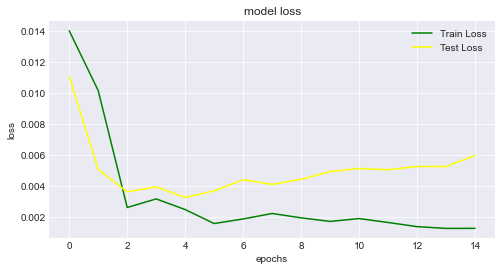

In [55]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')


plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

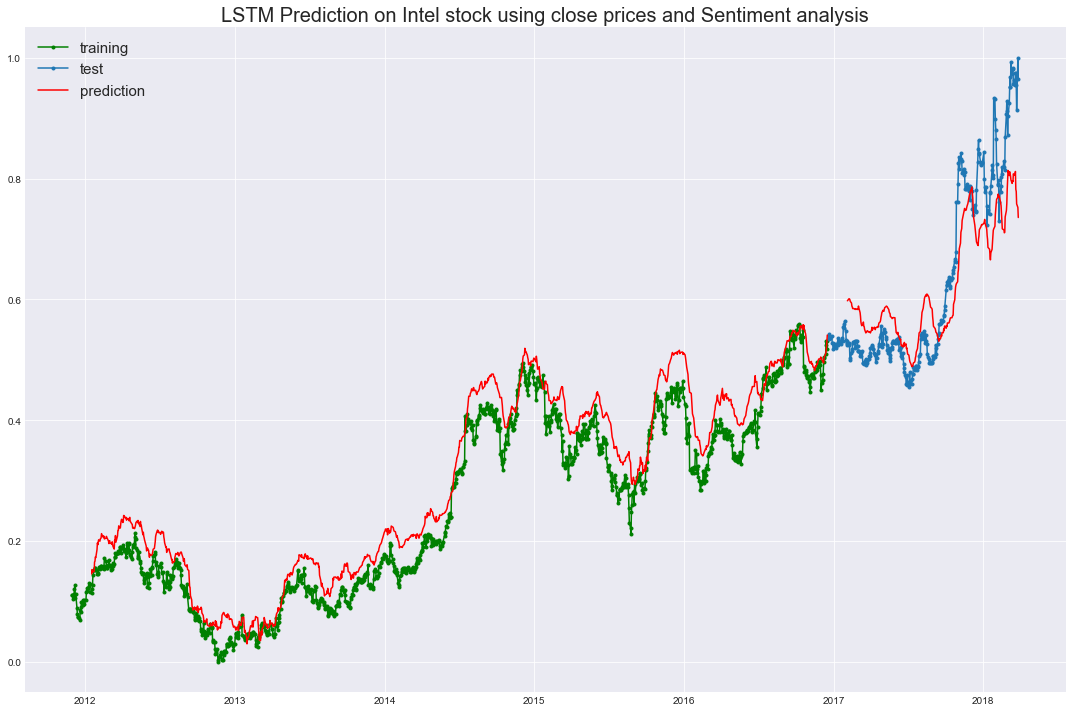

In [58]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[look_back+1:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[look_back+1:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM Prediction on Intel stock using close prices and Sentiment analysis",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();